# Scikit Learn test

## Fitting and predicting

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
clf = RandomForestClassifier(random_state=0)

X = [[ 1, 2, 3],
     [11, 12, 13]]
y = [0, 1]
clf.fit(X, y)

RandomForestClassifier(random_state=0)

In [33]:
clf.predict(X)

array([0, 1])

In [34]:
clf.predict([[4, 5, 6], [14, 15, 16], [4, 5, 9]])

array([0, 1, 0])

[0 1 0]


[Text(167.4, 163.07999999999998, 'X[0] <= 6.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

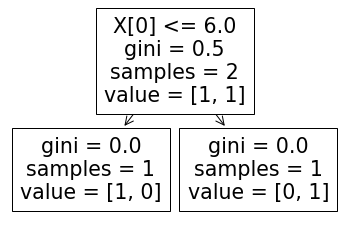

In [40]:
import sklearn

clfTree = sklearn.tree.DecisionTreeClassifier()
X = [[ 1, 2, 3],
     [11, 12, 13]]
y = [0, 1]
clfTree.fit(X, y)

print(clf.predict([[4, 5, 6], [14, 15, 16], [4, 5, 9]]))

sklearn.tree.plot_tree(clfTree)

## Transformers and pre-processors

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X = [[0, 15],
     [1, -10]]
StandardScaler().fit(X).transform(X)

array([[-1.,  1.],
       [ 1., -1.]])

## Pipelines: chaining pre-processors and estimators

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

In [ ]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
accuracy_score(pipe.predict(X_test), y_test)

0.9736842105263158

## Model evaluation

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

In [ ]:
X, y = make_regression(n_samples=1000, random_state=0)
lr = LinearRegression()

In [ ]:
result = cross_validate(lr, X, y)
result['test_score']

array([1., 1., 1., 1., 1.])

## Automatic parameter searches

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import randint

In [ ]:
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
param_distributions = {'n_estimators': randint(1, 5),
                       'max_depth': randint(5, 10)}

In [ ]:
search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0),
                            n_iter=5,
                            param_distributions=param_distributions,
                            random_state=0)
search.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025051B76D60>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025051B76A00>},
                   random_state=0)

In [ ]:
search.best_params_

{'max_depth': 9, 'n_estimators': 4}

In [ ]:
search.score(X_test, y_test)

0.735363411343253